There is a lot of information on runners and their performance for the Boston Marathon. Pick a year (post-2012 has more info) and do some clustering.

Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters. Write up your report, including your process from start to finish, in a Jupyter notebook and submit it below.

In [89]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("bm_2012_results.txt")
df

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,...,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,...,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,...,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,...,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,...,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


Looking at the data, there are a few obvious first steps. I can eliminate features like name and city, since those will be irrelevant. Next I'll create dummies from the gender column and look at frequencies for country, ctz, and state to see if they could be madee usable dummies:

In [90]:
df['gender'] = pd.get_dummies(df['gender'])

location_data = ['ctz','state','country']
for column in location_data:
    print(df[column].value_counts())

GBR    171
CAN    143
USA    135
JPN     95
IRL     68
MEX     62
GER     55
FRA     45
AUS     43
CHN     39
ITA     30
NZL     27
NED     22
VEN     19
ESP     18
KOR     17
IND     15
SUI     13
COL     13
SWE     12
BRA     10
ARG     10
RUS      8
NOR      8
PHI      8
ECU      8
RSA      8
AUT      7
BEL      7
DEN      6
      ... 
LIB      2
TPE      2
MAR      2
GEO      2
ROU      2
GRE      2
ISL      2
CRO      2
GUY      1
URU      1
ERI      1
UGA      1
KSA      1
IRI      1
PAK      1
CPV      1
NCA      1
HAI      1
BER      1
LAT      1
SLO      1
MLT      1
ESA      1
ETH      1
CMR      1
BAR      1
SRI      1
IRQ      1
ALG      1
BLR      1
Name: ctz, Length: 84, dtype: int64
MA    7587
CA    2326
NY    1553
ON    1052
PA    1001
TX     992
IL     916
OH     760
FL     750
VA     713
MI     695
NC     618
WA     596
CO     578
NJ     569
MN     556
MD     527
NH     526
CT     521
GA     443
WI     433
UT     431
QC     419
OR     406
AZ     318
IN     291
TN     

There are too many different locations, so I'll convert state and country to binary values-- in/out of Massachusetts/USA:

number of males: 17617
number of females: 14367


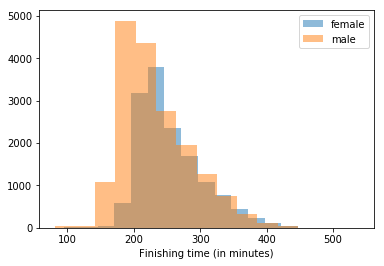

In [91]:
print("number of males: " + str(len(df.loc[df['gender'] == 0])))
print("number of females: " + str(len(df.loc[df['gender'] == 1])))

df['country'] = df['country'].apply(lambda x: 'From US' if x == 'USA' else 'Out of Country')
df = pd.concat([df, pd.get_dummies(df['country'])], axis=1)
df['state'] = df['state'].apply(lambda x: 'From MA' if x == 'MA' else 'Out of State')
df = pd.concat([df, pd.get_dummies(df['state'])], axis=1)

#See distribution of times for men/women
df_male = df[df['gender'] == 0]
df_female = df[df['gender'] == 1]
plt.hist(df_female['official'], alpha=0.5, label='female', bins=15)
plt.hist(df_male['official'], alpha=0.5, label='male', bins=15)
plt.legend(loc='upper right')
plt.xlabel('Finishing time (in minutes)')
plt.show()


In [92]:
#drop categorical values
X = df.drop(['overall', 'name', 'bib', 'ctz', 'city', 'country', 'state'], axis=1)
X = X.dropna()
#check data types
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31984 entries, 0 to 31983
Data columns (total 18 columns):
10k               31984 non-null object
division          31984 non-null int64
25k               31984 non-null object
gender            31984 non-null uint8
age               31984 non-null int64
official          31984 non-null float64
genderdiv         31984 non-null int64
35k               31984 non-null object
pace              31984 non-null float64
30k               31984 non-null object
5k                31984 non-null object
half              31984 non-null object
20k               31984 non-null object
40k               31984 non-null object
From US           31984 non-null uint8
Out of Country    31984 non-null uint8
From MA           31984 non-null uint8
Out of State      31984 non-null uint8
dtypes: float64(2), int64(3), object(8), uint8(5)
memory usage: 3.6+ MB


In [93]:
#check for null values
print(len(X))
print("number of rows containing NaN: " + str(31984 - len(X)) + " out of 31984")

#remove hyphens and convert strings to float
for col in X.columns:
    if X[col].dtype == 'object':
        X[col]= X[col].str.replace('-', '')
        X[col] = pd.to_numeric(X[col])

X = X.dropna()
np.where(np.isnan(X))
y = X['official']
X.info()
df[df['official'] < 120]

31984
number of rows containing NaN: 0 out of 31984
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31649 entries, 0 to 31983
Data columns (total 18 columns):
10k               31649 non-null float64
division          31649 non-null int64
25k               31649 non-null float64
gender            31649 non-null uint8
age               31649 non-null int64
official          31649 non-null float64
genderdiv         31649 non-null int64
35k               31649 non-null float64
pace              31649 non-null float64
30k               31649 non-null float64
5k                31649 non-null float64
half              31649 non-null float64
20k               31649 non-null float64
40k               31649 non-null float64
From US           31649 non-null uint8
Out of Country    31649 non-null uint8
From MA           31649 non-null uint8
Out of State      31649 non-null uint8
dtypes: float64(10), int64(3), uint8(5)
memory usage: 3.5 MB


,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,5k,half,20k,country,city,40k,From US,Out of Country,From MA,Out of State
0,17.37,"Yamamoto, Hiroyuki",8,47.67,0,47,85.25,W1,8,NaN,...,8.02,39.72,37.65,Out of Country,Fukuoka,80.43,0,1,0,1
2,16.62,"Van Dyk, Ernst F.",1,45.80,0,41,80.60,W2,1,NaN,...,7.75,38.03,36.10,Out of Country,Paarl,76.10,0,1,0,1
4,17.12,"Hokinoue, Kota",2,46.37,0,40,81.23,W3,2,NaN,...,8.02,38.60,36.58,Out of Country,Nogata Fukuoka,76.72,0,1,0,1
6,17.65,"Hug, Marcel E.",4,47.67,0,28,84.65,W4,4,NaN,...,8.38,39.72,37.65,Out of Country,Neuenkirch,79.83,0,1,0,1
8,17.12,"Soejima, Masazumi",3,46.37,0,43,81.23,W6,3,NaN,...,8.00,38.60,36.60,Out of Country,Isahaya,76.70,0,1,0,1
12,18.13,"Lemeunier, Denis Sr.",11,49.17,0,49,86.95,W7,11,NaN,...,8.40,41.18,39.03,Out of Country,Taule,82.17,0,1,0,1
14,17.12,"Cassidy, Josh R.",13,48.88,0,29,87.40,W8,13,NaN,...,8.02,40.20,38.02,Out of Country,Port Elgin,82.38,0,1,0,1
16,17.13,"Madera, Jordi",5,47.45,0,34,84.70,W9,5,NaN,...,8.02,39.12,36.98,Out of Country,Les Franquesas,79.92,0,1,0,1
18,18.17,"Hamerlak, Tomasz",7,49.15,0,38,84.88,W10,7,NaN,...,8.67,41.20,39.05,Out of Country,Bystra,80.18,0,1,0,1
23,18.17,"Botello Jimenez, Rafael",12,49.15,0,35,86.95,W12,12,NaN,...,8.68,41.20,39.05,Out of Country,Manlleu,82.17,0,1,0,1


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn import metrics

# Normalize the data.
X_norm = normalize(X)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2 = train_test_split(
    X_norm,
    test_size=0.5,
    random_state=None)
X1, X2 = train_test_split(
    X_half1,
    test_size=0.5,
    random_state=None)
X3, X4  = train_test_split(
    X_half2,
    test_size=0.5,
    random_state=None)

# Calculate predicted values.
#Use silhouette score because we don't have a ground truth
cluster_nums = [2, 3, 4, 5, 7, 10]

for num in cluster_nums:
    print("Number of Clusters: {}".format(num))
    arr = []
    for sample in [X1, X2, X3, X4]:
        y_pred = KMeans(n_clusters=num, random_state=42).fit(sample)
        labels = y_pred.labels_
        print(metrics.silhouette_score(sample, labels, metric='euclidean'))
        arr.append(metrics.silhouette_score(sample, labels, metric='euclidean'))



Number of Clusters: 2
0.6360712007909364
0.642306656971602
0.6372381834776433
0.6461707106506213
Number of Clusters: 3
0.6735129873941469
0.6741274707961992
0.6712071865564468
0.6792886993970526
Number of Clusters: 4
0.6466420902820835
0.6440162031243969
0.6435238675566192
0.6497186347461845
Number of Clusters: 5
0.6487046897960476
0.6483904863477465
0.6471343869425845
0.6554792115778832
Number of Clusters: 7
0.5443684260209081
0.5480239829490655
0.5499935831510374
0.5490465562625072
Number of Clusters: 10
0.5885338356409359
0.5923895996466028
0.5875672119045818
0.595966113245008


Using 3 clusters yielded the best silhouette score of ~0.675, which represents a good degree of closeness within the clusters and seperation among them. 

In [88]:
#try spectral clustering

from sklearn.cluster import MeanShift, estimate_bandwidth

for sample in [X1, X2, X3, X4]:
    bandwidth = estimate_bandwidth(sample, quantile=0.2, n_samples=500)
    print("bandwidth: {}".format(bandwidth))
    #bandwidth = 0.3
    model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    model.fit(sample)
    labels = model.labels_
    cluster_centers = model.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    print("Number of estimated clusters: {}".format(n_clusters_))
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

bandwidth: 0.12403936955515257
Number of estimated clusters: 7
0.6686266798860965
bandwidth: 0.12621074838937524
Number of estimated clusters: 5
0.660116782956162
bandwidth: 0.12588246757171706
Number of estimated clusters: 6
0.6622058482647969
bandwidth: 0.11230149572181398
Number of estimated clusters: 8
0.6269805269319585


In [79]:
#the number of clusters with the best results was K-means, yielding 3 clusters:
model = KMeans(n_clusters=3, random_state=42).fit(X_norm)
labels = model.labels_

X['clusters'] = labels

X_avg = X.groupby(['clusters'], as_index=False).mean()
print(X_avg)

   clusters        10k     division         25k    gender        age  \
0         0  38.340144   155.742308   96.824038  0.525962  32.967308   
1         1  53.156252  1393.336837  137.872570  0.351083  48.483863   
2         2  49.944584  3153.228541  128.788696  0.631194  31.230297   

     official    genderdiv         35k      pace         30k         5k  \
0  167.647894   239.307692  137.933673  6.402240  117.116615  19.151202   
1  251.196005  9433.106548  203.087483  9.589013  169.462378  26.415461   
2  231.135395  5950.628950  187.920141  8.823933  157.585081  24.876560   

         half         20k         40k   From US  Out of Country   From MA  \
0   81.471221   77.238740  158.490856  0.845192        0.154808  0.121154   
1  114.674335  108.580580  236.742740  0.822125        0.177875  0.213735   
2  107.352386  101.698591  218.277657  0.909481        0.090519  0.287749   

   Out of State  
0      0.878846  
1      0.786265  
2      0.712251  


Visual Analysis of Clusters

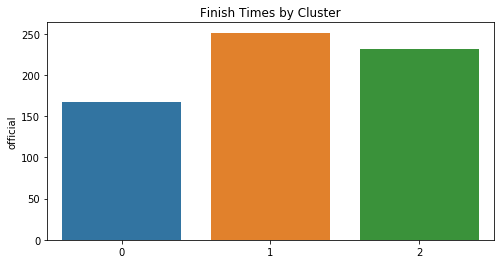

In [80]:
s = X.groupby(['clusters'], as_index=False).mean()['official']
g = sns.barplot(s.index, s)
g.figure.set_size_inches(8,4)
g.set_title("Finish Times by Cluster")
plt.show()

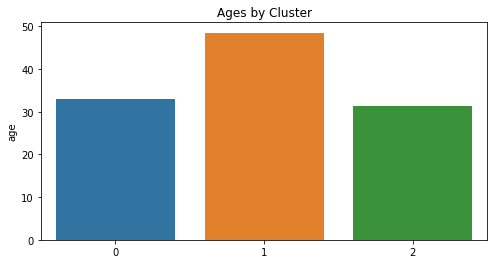

In [81]:
s = X.groupby(['clusters'], as_index=False).mean()['age']
g = sns.barplot(s.index, s)
g.figure.set_size_inches(8,4)
g.set_title("Ages by Cluster")
plt.show()

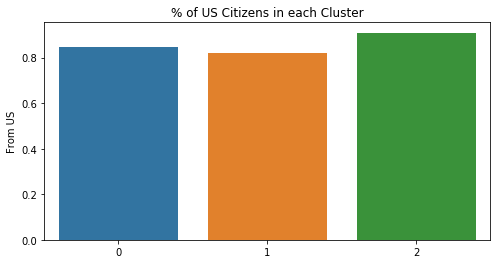

In [82]:
s = X.groupby(['clusters'], as_index=False).mean()['From US'] 
g = sns.barplot(s.index, s) 
g.figure.set_size_inches(8,4) 
g.set_title("% of US Citizens in each Cluster")
plt.show()

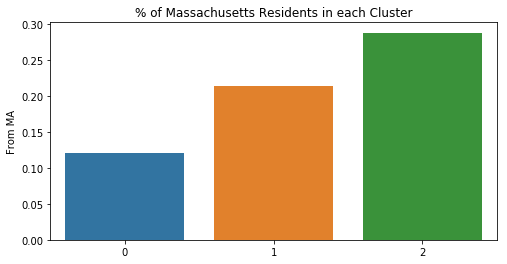

In [83]:
s = X.groupby(['clusters'], as_index=False).mean()['From MA'] 
g = sns.barplot(s.index, s) 
g.figure.set_size_inches(8,4) 
g.set_title("% of Massachusetts Residents in each Cluster")
plt.show()

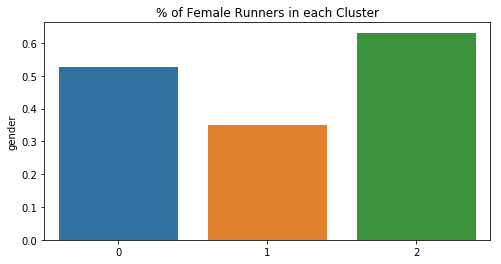

In [85]:
s = X.groupby(['clusters'], as_index=False).mean()['gender'] 
g = sns.barplot(s.index, s) 
g.figure.set_size_inches(8,4) 
g.set_title("% of Female Runners in each Cluster")
plt.show()

Cluster 0 was the fastest and had the lowest percentage of Massachusetts residents. This makes sense, and implies that there are many professional or enthusiastic runners in this cluster who are willing to travel to participate in the Marathon. <br>

Cluster 1 was the 'old man' cluster. It is the slowest, oldest, and had the highest percentage of male runners. <br>

Cluster 2 was the youngest, and had the highest percentage of local female runners. 

The silhouette score of ~0.675 implies fairly good clustering, and grants confidence to the analysis. 